In [53]:
import pandas as pandas 
from pandas import read_csv

data=read_csv("NIFTY.csv",index_col="Date",parse_dates=True)

In [54]:
print(data.head(10))
print("Dataset size:",data.shape)


n_input=7 #the model will use the previous 7 observations to predict the next observation in the time series.
n_features=data.shape[1] # Number of features (or variables) in the dataset

# Splitting data into train and test sets
train_data=data[:1379]
test_data=data[1379:]

             Open   High    Low  Turnover
Date                                     
02-03-2009  43.19  43.38  41.44     43.17
03-03-2009  43.17  43.90  41.20     43.89
04-03-2009  43.89  43.89  42.16     42.52
05-03-2009  42.52  42.71  40.41     41.49
06-03-2009  41.49  41.49  37.57     38.16
09-03-2009  38.16  41.14  38.16     40.87
12-03-2009  40.87  40.87  38.50     39.27
13-03-2009  39.27  39.27  35.08     35.56
16-03-2009  35.56  37.88  35.56     36.70
17-03-2009  36.70  38.76  34.85     38.43
Dataset size: (2769, 4)


Normalize the data

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.fit_transform(test_data)

print(train_data[0])

[0.72709046 0.69154676 0.7421794  0.70483926]


TimeseriesGenerator for training and testing data

In [56]:
from keras.preprocessing.sequence import TimeseriesGenerator

generator=TimeseriesGenerator(train_data,train_data,length=n_input,batch_size=1)
generator_test=TimeseriesGenerator(test_data,test_data,length=n_input,batch_size=1)

print(generator[0])
#Creates batches of temporal data samples from the provided dataset for training the model. Each sample in the generator contains length (n_input) time steps.

(array([[[0.72709046, 0.69154676, 0.7421794 , 0.70483926],
        [0.72661871, 0.70323741, 0.73632539, 0.72131335],
        [0.74360184, 0.70301259, 0.75974145, 0.68996682],
        [0.71128671, 0.67648381, 0.71705592, 0.66639973],
        [0.68699139, 0.64905576, 0.6477834 , 0.59020707],
        [0.60844439, 0.64118705, 0.66217452, 0.65221371],
        [0.67236702, 0.63511691, 0.67046771, 0.61560462]]]), array([[0.63462672, 0.59914568, 0.58704799, 0.53071731]]))


In [57]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,GRU


#SimpleRNN
model_s=Sequential()
model_s.add(SimpleRNN(units=100,input_shape=(n_input,n_features),activation="tanh"))
model_s.add(Dense(n_features,activation="tanh"))
model_s.compile(optimizer='adam',loss="mean_squared_error",metrics=['accuracy'])
history_s=model_s.fit(generator,epochs=5)
loss_s,accuracy_s=model_s.evaluate(generator_test)

print("loss:",{loss_s})
print("accuracy:",{accuracy_s})

#LSTM
model_l=Sequential()
model_l.add(LSTM(units=100,input_shape=(n_input,n_features),activation="tanh"))
model_l.add(Dense(n_features,activation="tanh"))
model_l.compile(optimizer='adam',loss="mean_squared_error",metrics=['accuracy'])
history_l=model_l.fit(generator,epochs=5)
loss_l,accuracy_l=model_l.evaluate(generator_test)

print("loss:",{loss_l})
print("accuracy:",{accuracy_l})


#GRU
model_g=Sequential()
model_g.add(GRU(units=100,input_shape=(n_input,n_features),activation="tanh"))
model_g.add(Dense(n_features,activation="tanh"))
model_g.compile(optimizer='adam',loss="mean_squared_error",metrics=['accuracy'])
history_g=model_g.fit(generator,epochs=5)
loss_g,accuracy_g=model_g.evaluate(generator_test)

print("loss:",{loss_g})
print("accuracy:",{accuracy_g})


Epoch 1/5
1372/1372 [==============================] - 3s 1ms/step - loss: 0.0028 - accuracy: 0.4133
Epoch 2/5
1372/1372 [==============================] - 2s 2ms/step - loss: 0.0014 - accuracy: 0.4978
Epoch 3/5
1372/1372 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.5219
Epoch 4/5
1372/1372 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 0.5561
Epoch 5/5
1383/1383 [==============================] - 2s 1ms/step - loss: 3.9521e-04 - accuracy: 0.6218
loss: {0.000395205250242725}
accuracy: {0.6218366026878357}
Epoch 1/5
1372/1372 [==============================] - 9s 4ms/step - loss: 0.0026 - accuracy: 0.4883
Epoch 2/5
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0014 - accuracy: 0.5153
Epoch 3/5
1372/1372 [==============================] - 4s 3ms/step - loss: 0.0011 - accuracy: 0.5503
Epoch 4/5
1372/1372 [==============================] - 4s 3ms/step - loss: 9.5119e-04 - accuracy: 0.5583
Epoch 5/5
1383/1383 [==

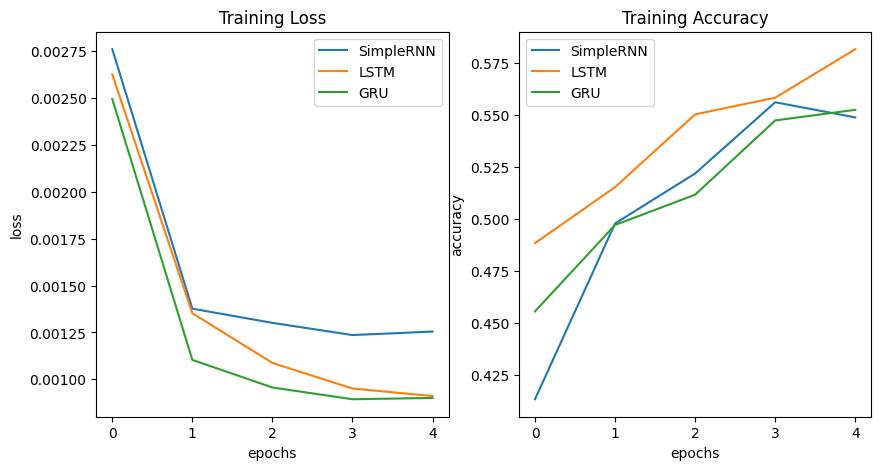

In [58]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.plot(history_s.history['loss'],label="SimpleRNN")
plt.plot(history_l.history['loss'],label="LSTM")
plt.plot(history_g.history['loss'],label="GRU")
plt.title('Training Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_s.history['accuracy'],label="SimpleRNN")
plt.plot(history_l.history['accuracy'],label="LSTM")
plt.plot(history_g.history['accuracy'],label="GRU")

plt.title('Training Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

In [59]:
prediction_s=model_s.predict(generator_test[10][0])
prediction_l=model_l.predict(generator_test[10][0])
prediction_g=model_g.predict(generator_test[10][0])

print("Actual Input:=",generator_test[10][0])
print("Actual Output:              ",generator_test[10][1])
print("Precidicted using SimpleRNN:",prediction_s)
print("Precidicted using LSTM:     ",prediction_l)
print("Precidicted using GRU:      ",prediction_g)


1/1 [==============================] - 0s 300ms/step
Actual Input:= [[[0.04015172 0.0363984  0.05902481 0.03687124]
  [0.03687124 0.0352115  0.06066129 0.03488928]
  [0.03488928 0.0496192  0.0631532  0.05487972]
  [0.05487972 0.05327882 0.07319522 0.05009568]
  [0.05009568 0.04358577 0.05939673 0.03700793]
  [0.03700793 0.0481026  0.05489642 0.05306862]
  [0.05306862 0.05832317 0.07910886 0.05539229]]]
Actual Output:               [[0.05539229 0.05927929 0.06214899 0.05665664]]
Precidicted using SimpleRNN: [[0.05462372 0.05532109 0.06816405 0.0445568 ]]
Precidicted using LSTM:      [[0.05974378 0.06529586 0.07952629 0.05995842]]
Precidicted using GRU:       [[0.05974671 0.07304444 0.08395261 0.07224198]]


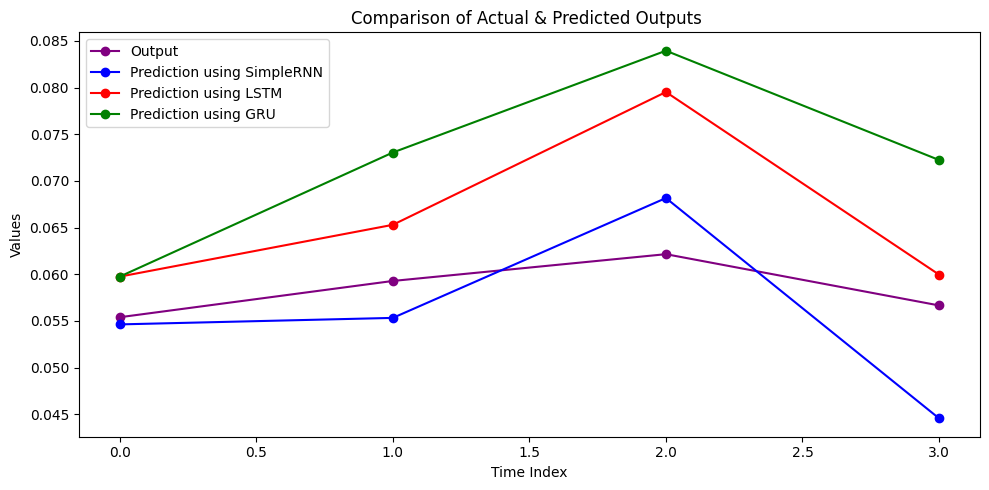

In [67]:
import numpy as np

actual_input=np.array(generator_test[10][0])
actual_output=np.array(generator_test[10][1])
predicted_simplernn=np.array(prediction_s)
predicted_lstm=np.array(prediction_l)
predicted_gru=np.array(prediction_g)



plt.figure(figsize=(10,5))
#plt.plot(actual_input.flatten(),label='Input',marker='o',color='black',linestyle='-')
plt.plot(actual_output.flatten(),label='Output',marker='o',color='purple',linestyle='-')
plt.plot(predicted_simple_rnn.flatten(),label='Prediction using SimpleRNN',marker='o',color='blue',linestyle='-')
plt.plot(predicted_lstm.flatten(),label='Prediction using LSTM',marker='o',color='red',linestyle='-')
plt.plot(predicted_gru.flatten(),label='Prediction using GRU',marker='o',color='green',linestyle='-')

plt.xlabel("Time Index")
plt.ylabel("Values")
plt.title("Comparison of Actual & Predicted Outputs ")
plt.legend()
plt.tight_layout()
plt.show()